In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co544-bike-sharing-project/hour.csv
/kaggle/input/co544-bike-sharing-project/Readme.txt
/kaggle/input/co544-bike-sharing-project/day.csv


# Import Data

In [2]:
# load the training dataset
df = pd.read_csv('/kaggle/input/co544-bike-sharing-project/day.csv')
df.shape

(731, 16)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data Wrangling

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Replace **dteday** column using from the existing **dteday** column date value.

In [6]:
# Replace dteday column using from the existing dteday column date value.
df['dteday'] = pd.DatetimeIndex(df['dteday']).day
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Statistical Analysis

Analysis of the data by examining descriptive statistics for the numeric features and the **cnt** label column.

In [7]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed','casual','registered']
df[numeric_features + ['cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Data PreProcessing

In [8]:
from sklearn import preprocessing

norm_data = preprocessing.normalize([df['registered']])
df['registered']=norm_data[0]

In [9]:
df[numeric_features + ['cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,0.034022,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,0.014519,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,0.000186,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,0.023235,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,0.034076,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,0.044447,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,0.064635,8714.000000


# Data Visualization

## Distribution of label : bike rentals count

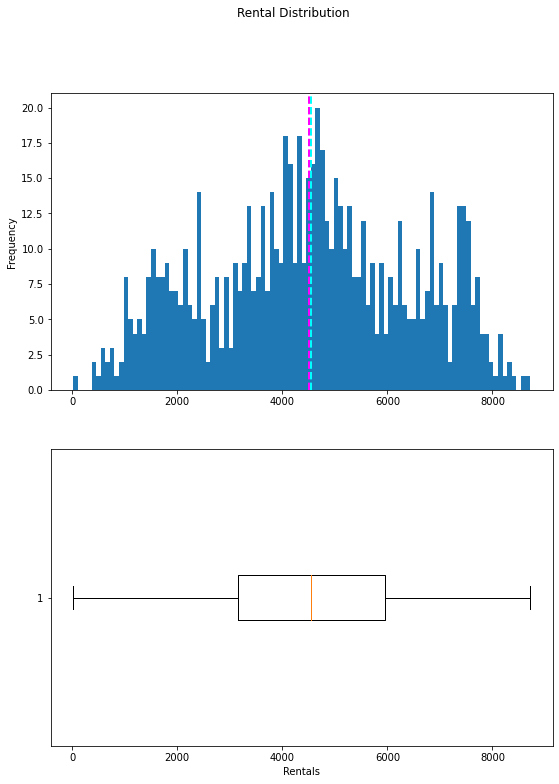

In [10]:
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = df['cnt']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


## Visualization of numeric features --> histogram

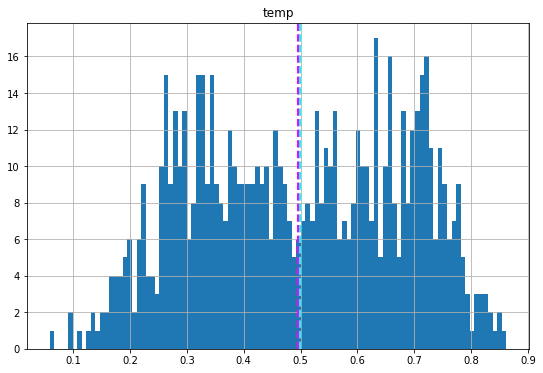

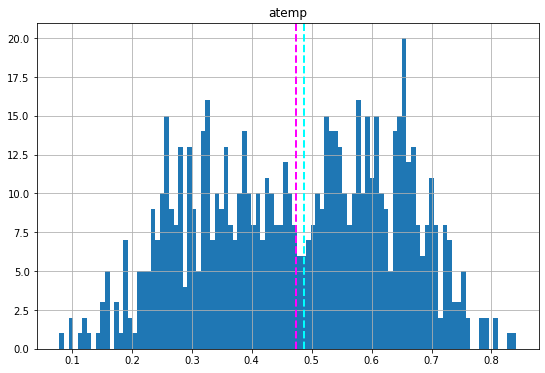

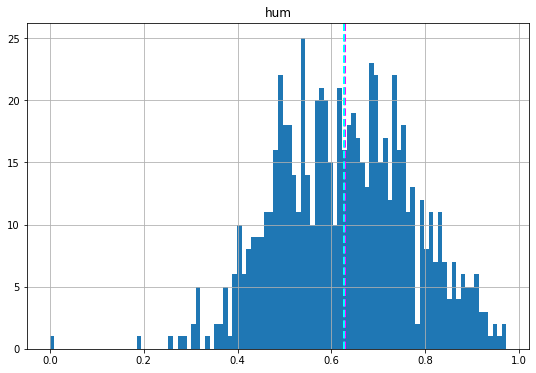

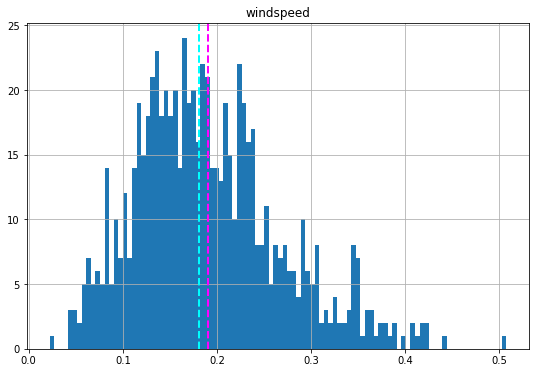

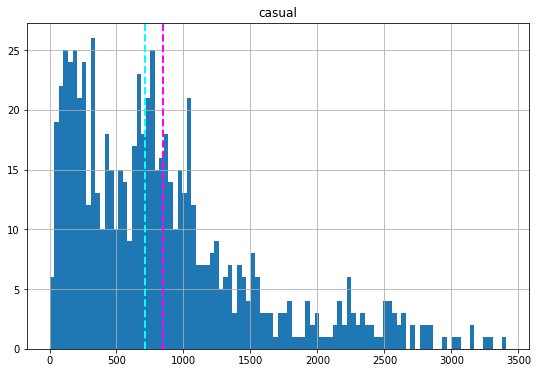

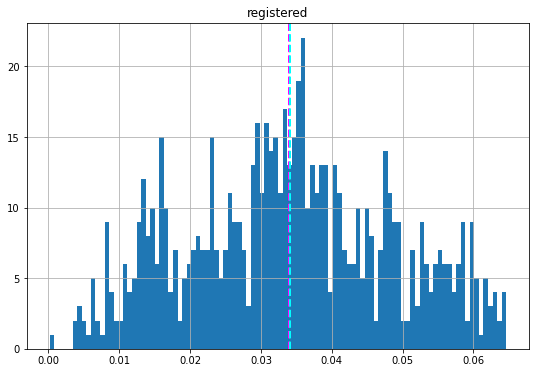

In [11]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

## Scatter Matrix

array([[<AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='atemp', ylabel='temp'>,
        <AxesSubplot:xlabel='hum', ylabel='temp'>,
        <AxesSubplot:xlabel='windspeed', ylabel='temp'>,
        <AxesSubplot:xlabel='casual', ylabel='temp'>,
        <AxesSubplot:xlabel='registered', ylabel='temp'>],
       [<AxesSubplot:xlabel='temp', ylabel='atemp'>,
        <AxesSubplot:xlabel='atemp', ylabel='atemp'>,
        <AxesSubplot:xlabel='hum', ylabel='atemp'>,
        <AxesSubplot:xlabel='windspeed', ylabel='atemp'>,
        <AxesSubplot:xlabel='casual', ylabel='atemp'>,
        <AxesSubplot:xlabel='registered', ylabel='atemp'>],
       [<AxesSubplot:xlabel='temp', ylabel='hum'>,
        <AxesSubplot:xlabel='atemp', ylabel='hum'>,
        <AxesSubplot:xlabel='hum', ylabel='hum'>,
        <AxesSubplot:xlabel='windspeed', ylabel='hum'>,
        <AxesSubplot:xlabel='casual', ylabel='hum'>,
        <AxesSubplot:xlabel='registered', ylabel='hum'>],
       [<AxesSubplot:x

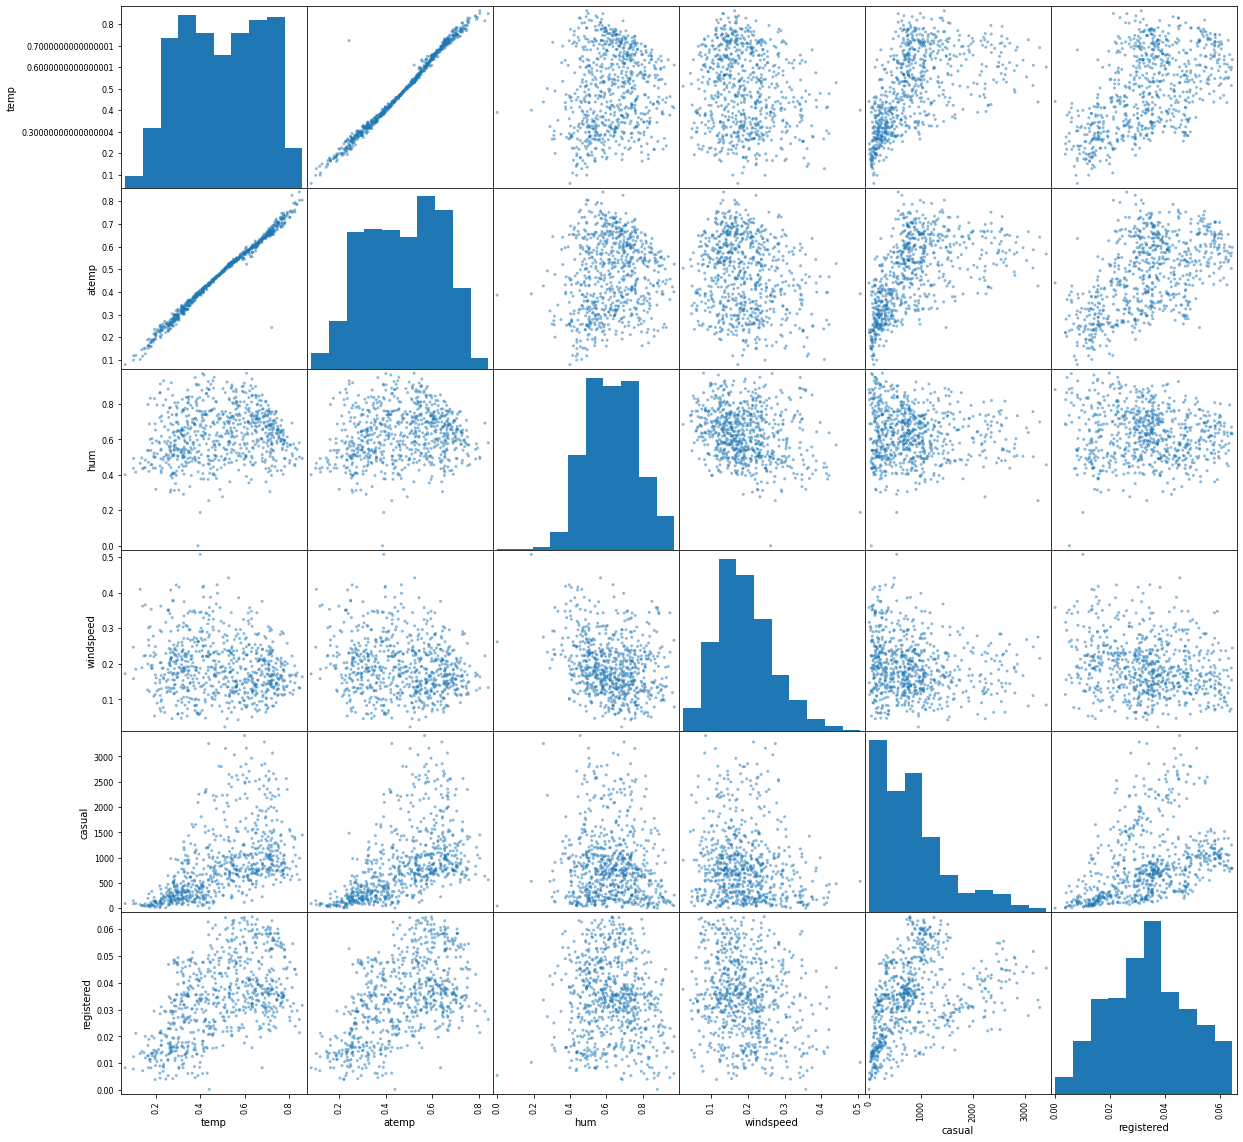

In [12]:
numeric_df=df[['temp', 'atemp', 'hum', 'windspeed','casual','registered']]
pd.plotting.scatter_matrix(numeric_df, figsize=(20,20))

## Visualization of categorical features --> bar chart

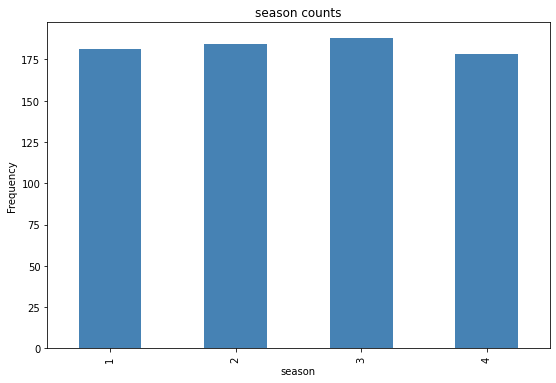

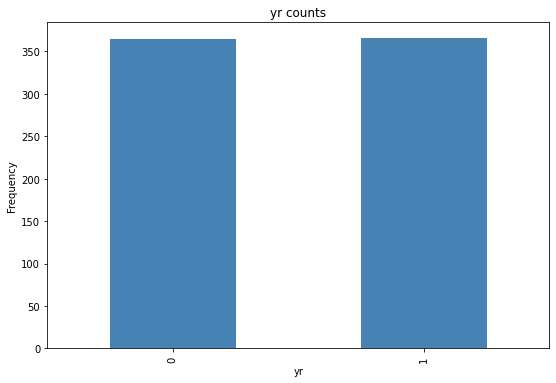

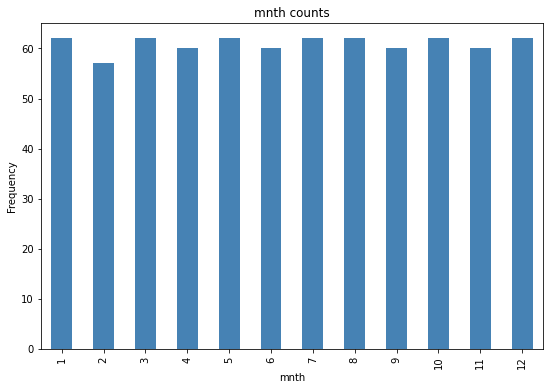

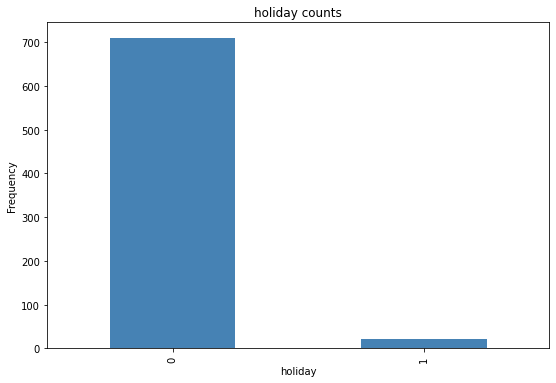

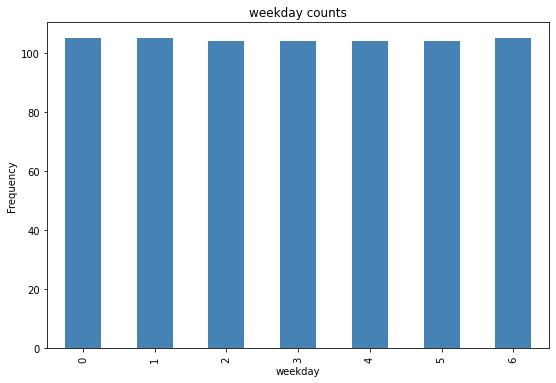

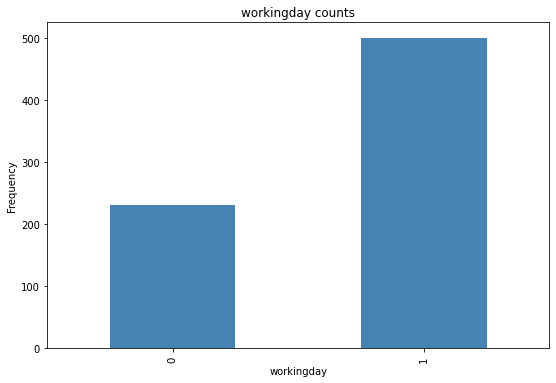

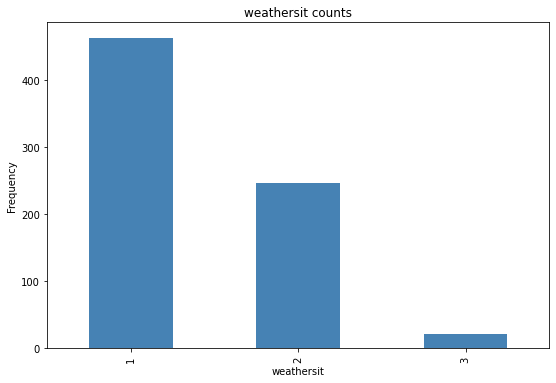

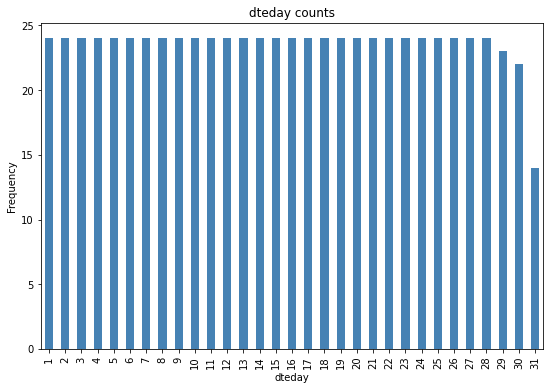

In [13]:
# plot a bar plot for each categorical feature count
categorical_features = ['season','yr','mnth','holiday','weekday','workingday','weathersit', 'dteday']

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

## Visualize relationships between the features and the **cnt** label

Scatter plots with **correlation** statistic to show the intersection of each numeric feature and label values.

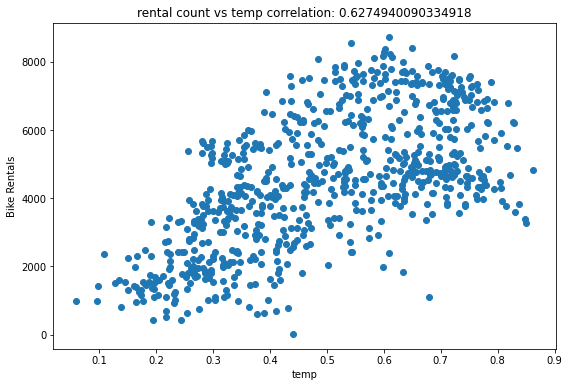

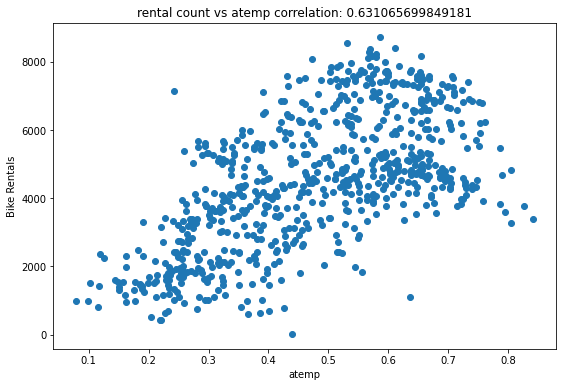

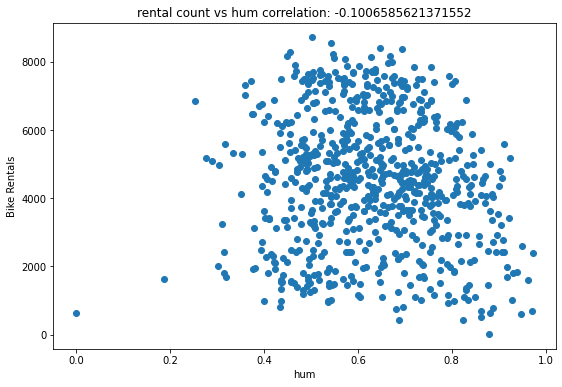

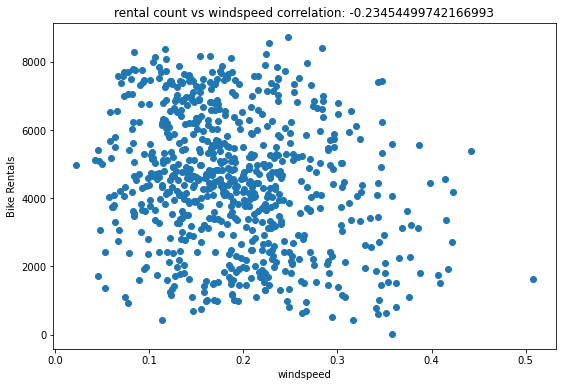

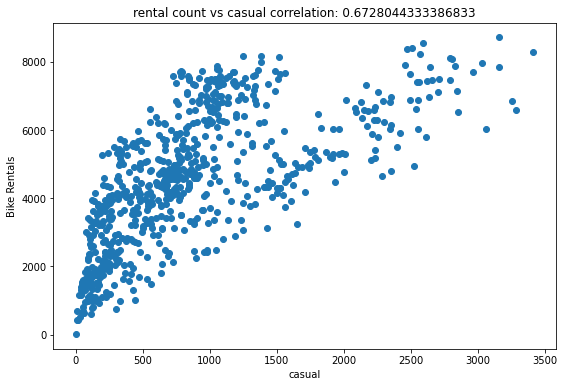

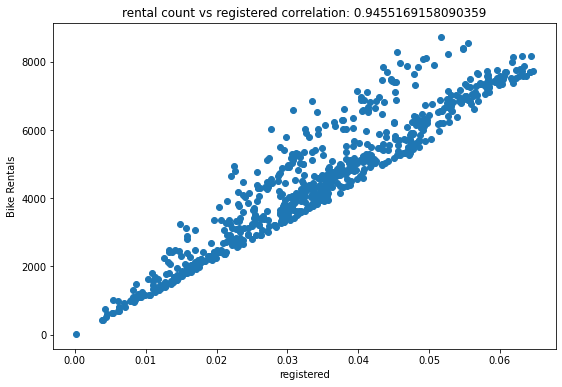

In [14]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rental count vs ' + col + ' correlation: ' + str(correlation))
plt.show()

- **temp** and **atemp**, shows a diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value over 0.5 for both of these features supports this observation.
- **hum** and **windspeed** show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

## Box plots to compare rental count with categorical features

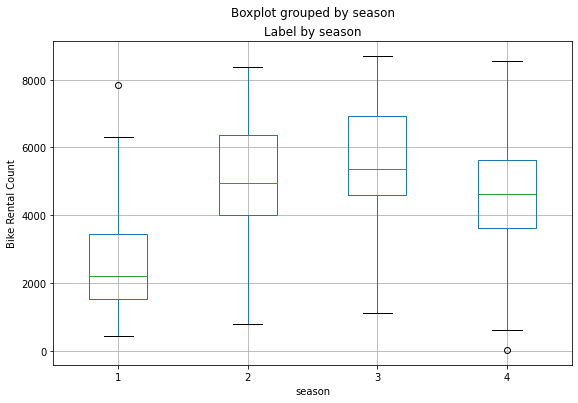

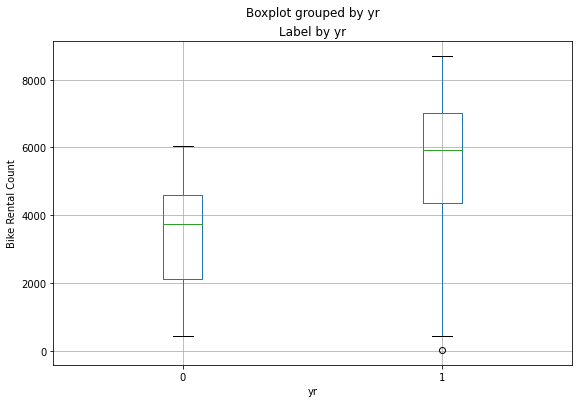

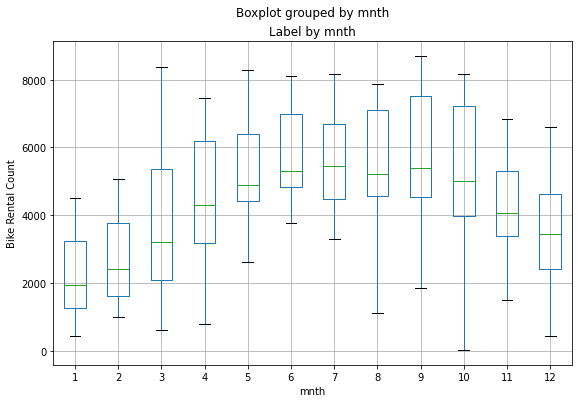

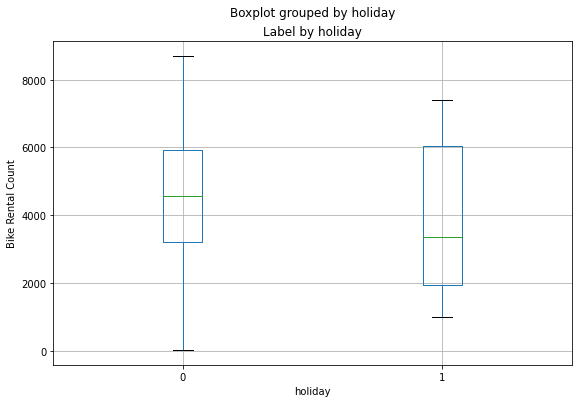

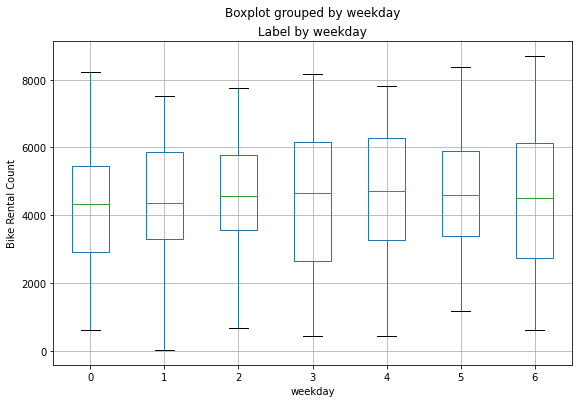

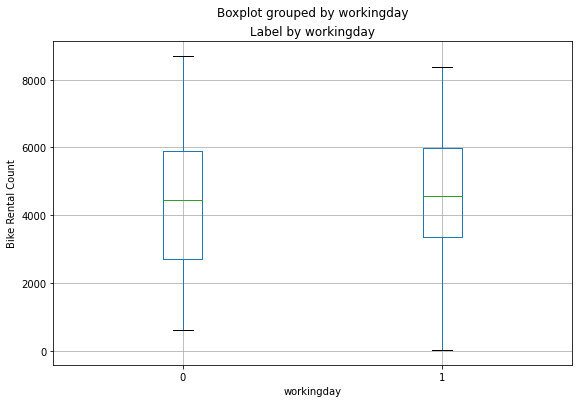

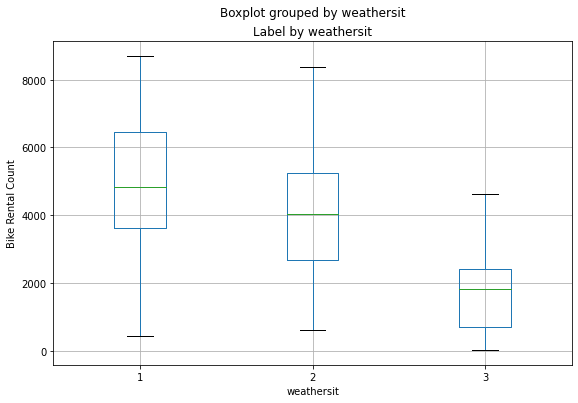

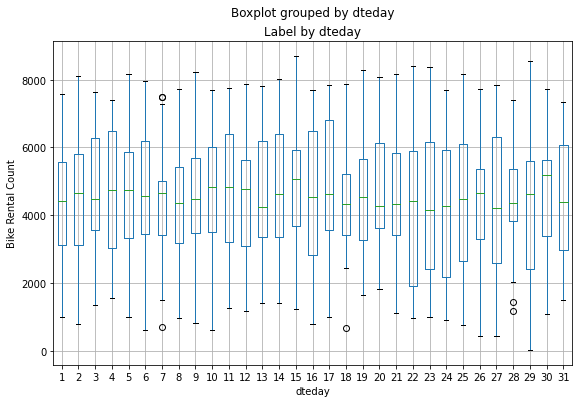

In [15]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'cnt', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rental Count")
plt.show()

## Co-relation co-efficients

In [16]:
df.corr()["cnt"]

instant       0.628830
dteday       -0.024204
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

## Scatter Matrix

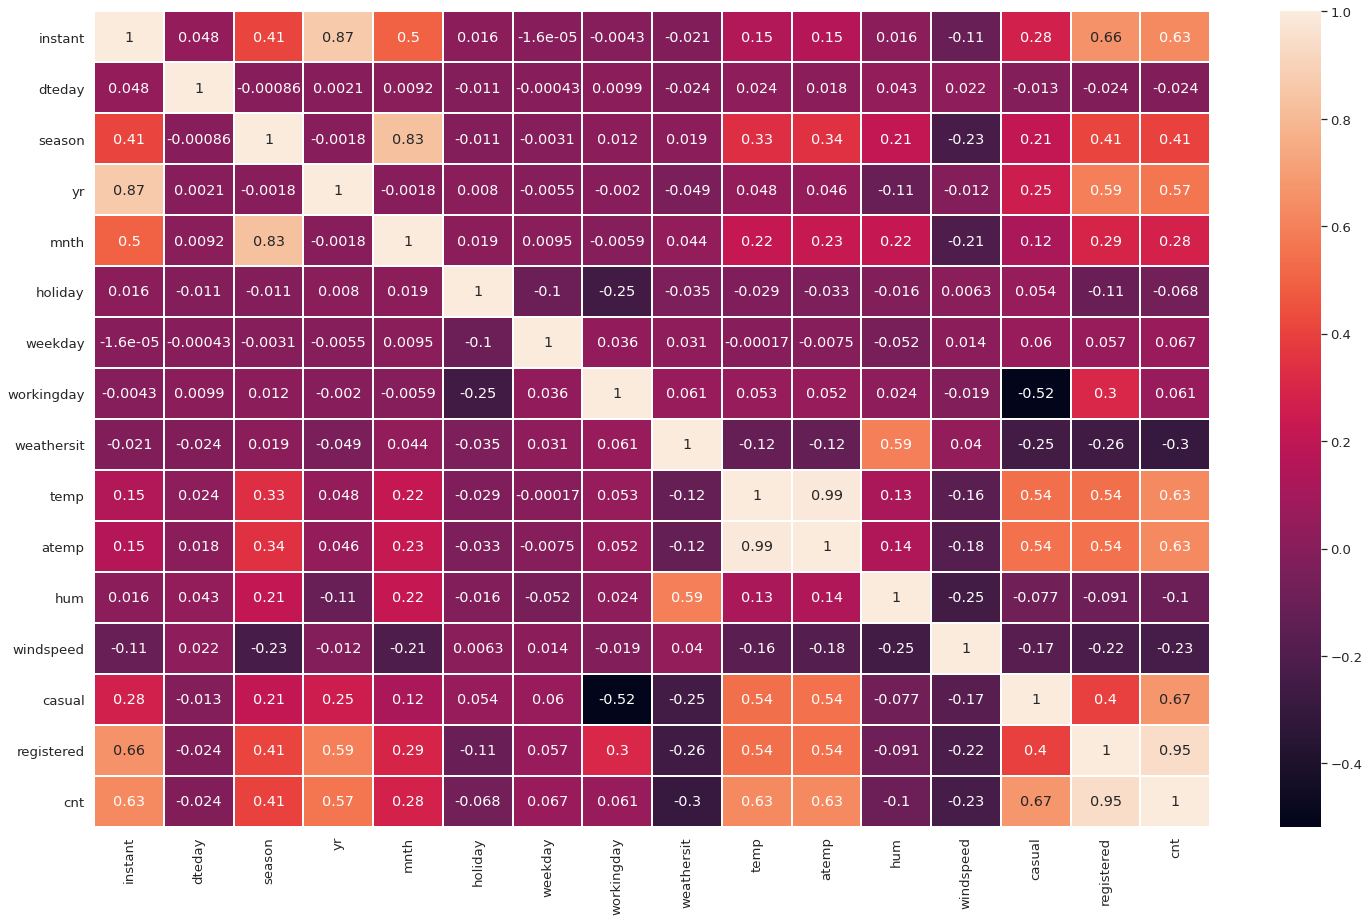

In [17]:
import seaborn as sns
plt.figure(figsize=(25, 15))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

# Split Data

In [18]:
# Separate features and labels [['temp', 'atemp', 'hum', 'windspeed','casual','registered']]  ['season','yr','mnth','holiday','weekday','workingday','weathersit', 'dteday']
X, y = df[['season','yr','mnth', 'holiday','weekday','dteday','workingday','weathersit','temp', 'hum', 'windspeed','casual','registered']].values, df['cnt'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  6.00000000e+00 1.00000000e+00 0.00000000e+00 2.00000000e+00
  3.44167000e-01 8.05833000e-01 1.60446000e-01 3.31000000e+02
  6.08567632e-03]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 2.00000000e+00 0.00000000e+00 2.00000000e+00
  3.63478000e-01 6.96087000e-01 2.48539000e-01 1.31000000e+02
  6.23456136e-03]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 3.00000000e+00 1.00000000e+00 1.00000000e+00
  1.96364000e-01 4.37273000e-01 2.48309000e-01 1.20000000e+02
  1.14362327e-02]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  2.00000000e+00 4.00000000e+00 1.00000000e+00 1.00000000e+00
  2.00000000e-01 5.90435000e-01 1.60296000e-01 1.08000000e+02
  1.35299287e-02]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  3.00000000e+00 5.00000000e+00 1.00000000e+00 1.00000000e+00
  2.26957000e-01 4.36957000e-01 1.86900000e-01 8.2

In [19]:
import sklearn
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


# Train Regression Model

## Linear algorithm 1 - Linear Regression

## Linear algorithm 2 - Lasso

## Linear algorithms 3 - Ridge

## Tree-based algorithm 1 - Decision Tree regression

## Ensemble algorithm 1 - Random Forest model

## Ensemble algorithm 2 - Gradient Boosting estimator

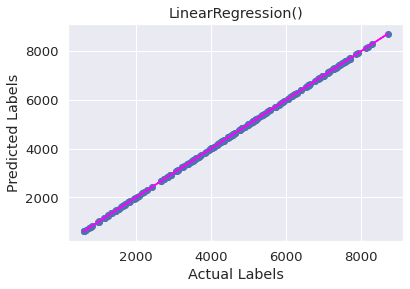

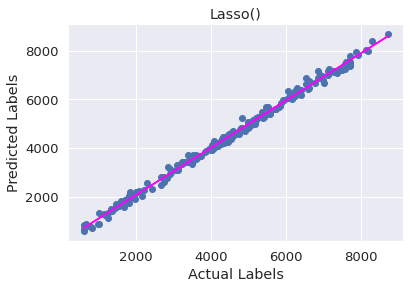

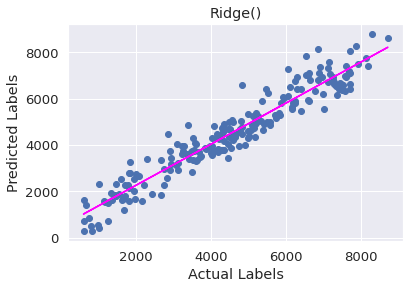

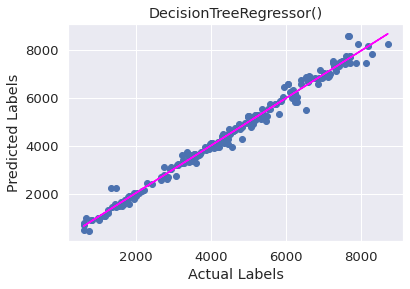

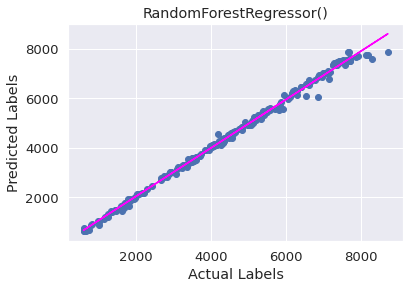

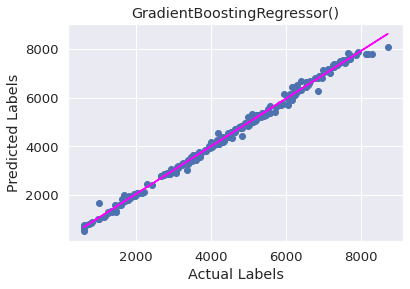

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

predictions=[]
models=[['LinearRegression',LinearRegression()],
        ['Lasso',Lasso()],
        ['Ridge',Ridge()],
        ['DecisionTreeRegressor',DecisionTreeRegressor()],
        ['RandomForestRegressor',RandomForestRegressor()],
        ['GradientBoostingRegressor',GradientBoostingRegressor()]]

MSE=[]
RMSE=[]
R2=[]

for name,model in models:
    model=model
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    
    %matplotlib inline
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title(str(model))
    # overlay the regression line
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()

    # Errors
    mse = mean_squared_error(y_test, predictions)
    MSE.append(mse)
    RMSE.append(np.sqrt(mse))
    R2.append(r2_score(y_test, predictions))
    

### Quantify the residuals by calculating evaluation metrics,
* Mean Square Error (MSE)
* Root Mean Square Error (RMSE)
* Coefficient of Determination (*R-squared* : R<sup>2</sup>)

In [21]:
for i in range(len(MSE)):
    print(models[i][1], MSE[i])

LinearRegression() 1.386480722435318e-21
Lasso() 19009.01080937228
Ridge() 341180.9020419402
DecisionTreeRegressor() 52775.45909090909
RandomForestRegressor() 19515.268084999996
GradientBoostingRegressor() 19536.317882750674


In [22]:
for i in range(len(RMSE)):
    print(models[i][1], RMSE[i])

LinearRegression() 3.7235476664537515e-11
Lasso() 137.87316928747333
Ridge() 584.1069268909077
DecisionTreeRegressor() 229.7290993559786
RandomForestRegressor() 139.697058254639
GradientBoostingRegressor() 139.77237882625693


In [23]:
for i in range(len(R2)):
    print(models[i][1], R2[i])

LinearRegression() 1.0
Lasso() 0.9953941117525847
Ridge() 0.917331778980171
DecisionTreeRegressor() 0.987212492579629
RandomForestRegressor() 0.9952714454834471
GradientBoostingRegressor() 0.9952663451119947


### Hyperparameter Tuning

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 17928.76583909403
RMSE: 133.89834143518743
R2: 0.9956558553889491


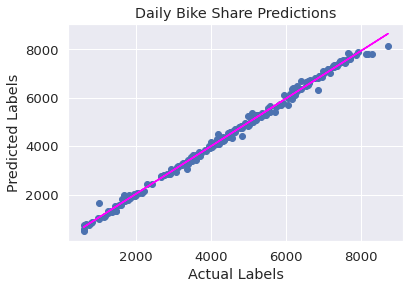

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Data Preprocessing -- should be done before training model

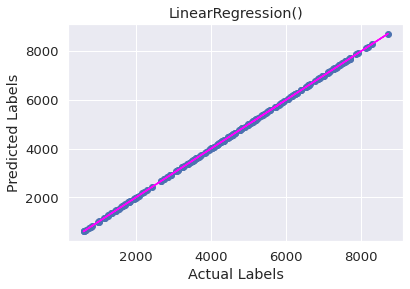

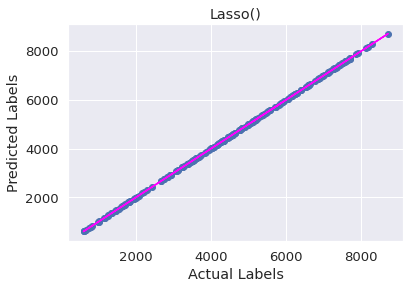

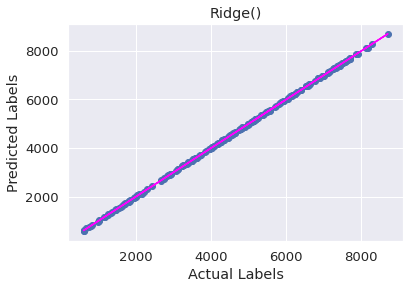

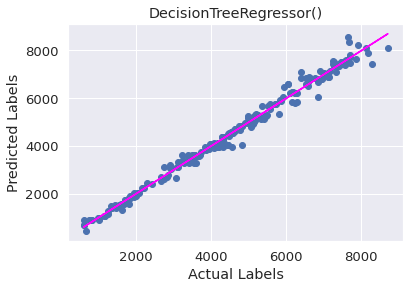

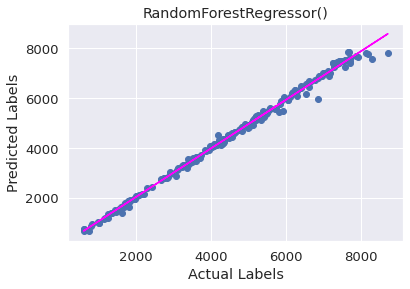

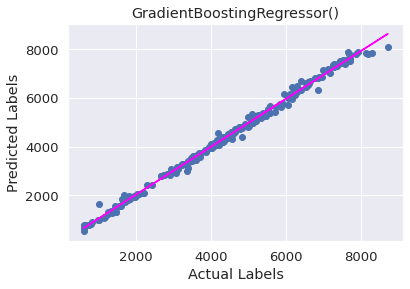

In [25]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [8,9,10,11,12]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,6,7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


predictions=[]
RMSE=[]
R2=[]
EVS=[]

for name,prediction_model in models:
    prediction_model=prediction_model
    # Create preprocessing and training pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', prediction_model)])
    model = pipeline.fit(X_train, (y_train))
    
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    RMSE.append(np.sqrt(mse))        
    R2.append(r2_score(y_test, predictions))
    EVS.append(explained_variance_score(y_test, predictions))
    
    # Plot predicted vs actual
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title(str(prediction_model))
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()


## After Preprocessing : Erros


In [26]:
for i in range(len(RMSE)):
    print(models[i][1], RMSE[i])

LinearRegression() 9.71115372445517e-05
Lasso() 1.2870824931787181
Ridge() 15.963534949971496
DecisionTreeRegressor() 222.63455584105864
RandomForestRegressor() 145.00463856843902
GradientBoostingRegressor() 139.07018459402508


In [27]:
for i in range(len(R2)):
    print(models[i][1], R2[i])

LinearRegression() 0.9999999999999977
Lasso() 0.9999995986099108
Ridge() 0.9999382535471568
DecisionTreeRegressor() 0.9879901101057712
RandomForestRegressor() 0.9949053111051767
GradientBoostingRegressor() 0.9953137879000662


In [28]:
for i in range(len(EVS)):
    print(models[i][1], EVS[i])

LinearRegression() 0.9999999999999978
Lasso() 0.9999995992026574
Ridge() 0.999939794450767
DecisionTreeRegressor() 0.9879919243740183
RandomForestRegressor() 0.995026141805868
GradientBoostingRegressor() 0.9953538192407387
